<a href="https://colab.research.google.com/github/Nahom32/MLP-Assignment/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MPG Regression Problem

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
data = pd.read_csv('/content/drive/My Drive/auto-mpg.csv')

In [48]:
print(display(data.head()))


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


None


In [49]:
print(display(data.tail()))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


None


In [50]:
data.drop(columns=['car name'], inplace=True)

In [51]:
data.shape

(398, 8)

In [34]:
print(display(data.head()))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


None


In [52]:
print(data.isnull())

       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False         False       False   False         False   

     model year  origin  
0         False   False  
1         False   False  
2         False   False  
3         False   F

In [53]:
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [54]:
print(data.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [55]:
print(data.isnull().any().any())

False


###Data Presentation

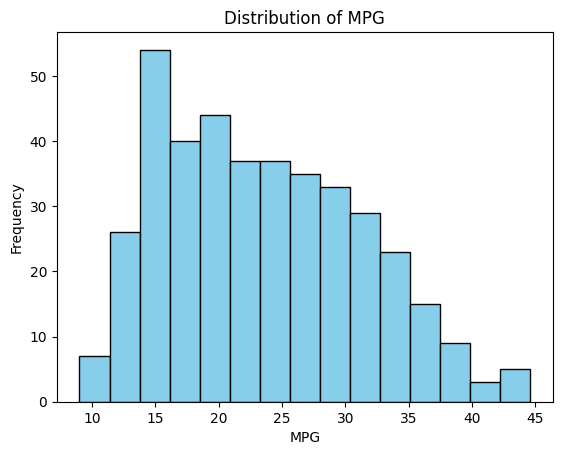

In [43]:
plt.hist(data["mpg"], bins=15, edgecolor="black", color="skyblue")
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

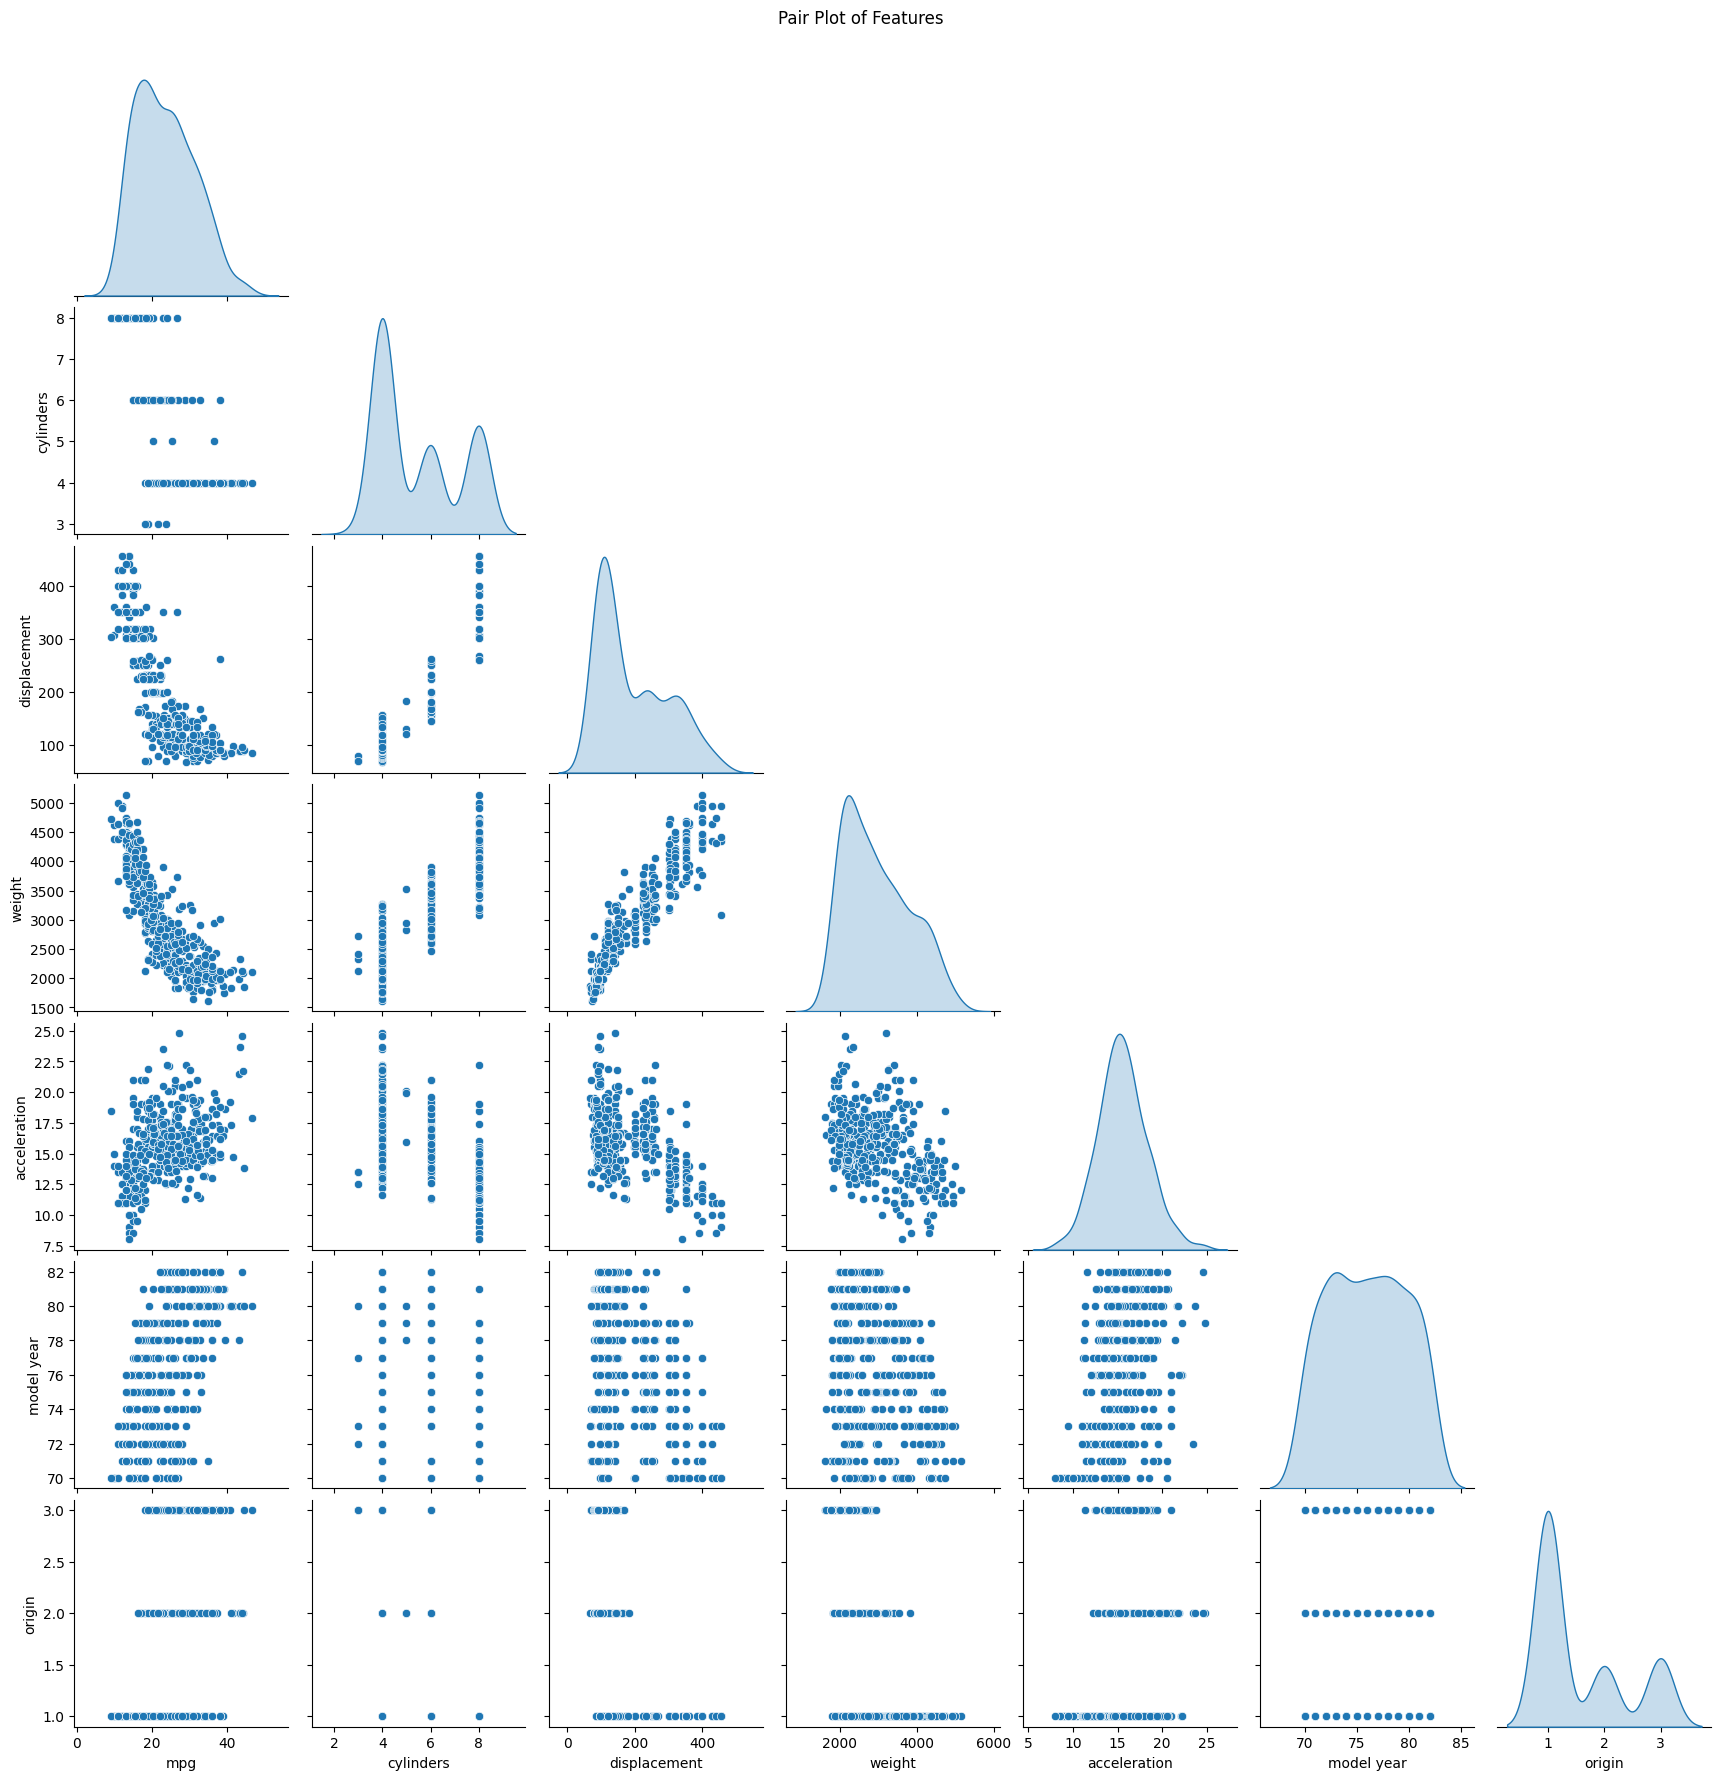

In [56]:
sns.pairplot(data, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

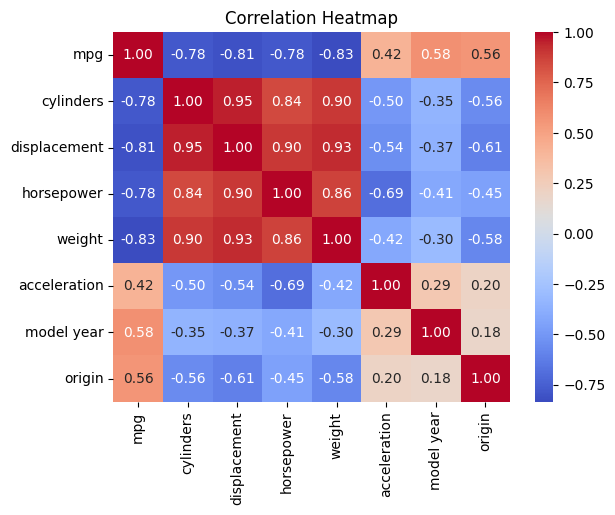

In [45]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


###Feature Engineering

In [57]:
data["horsepower"] = pd.to_numeric(data["horsepower"], errors="coerce")
Q1 = data["mpg"].quantile(0.25)
Q3 = data["mpg"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boolean masking to remove outliers
mask = (data["mpg"] >= lower_bound) & (data["mpg"] <= upper_bound)
data = data[mask]

In [58]:
X = data.drop("mpg", axis=1)
y = data["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.impute import SimpleImputer
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
]

)

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [60]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 10.167010350463817
R2 Score: 0.8127104975020049


In [46]:
from google.colab import files
import pickle
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
files.download('regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>